# Preparing Datasets 

Both dataset1 (Sentinal 2) and dataset2 (resisc45) are both available as built-in from the tensorflow catalog and can be accessed via the tfds.builder()/tfds.load() methods. See below

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

## resisc45 data

In [2]:
builder = tfds.builder('resisc45')
info = builder.info

In [3]:
info.features

FeaturesDict({
    'filename': Text(shape=(), dtype=tf.string),
    'image': Image(shape=(256, 256, 3), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=45),
})

In [4]:
print(info.features['label'].names)

['airplane', 'airport', 'baseball_diamond', 'basketball_court', 'beach', 'bridge', 'chaparral', 'church', 'circular_farmland', 'cloud', 'commercial_area', 'dense_residential', 'desert', 'forest', 'freeway', 'golf_course', 'ground_track_field', 'harbor', 'industrial_area', 'intersection', 'island', 'lake', 'meadow', 'medium_residential', 'mobile_home_park', 'mountain', 'overpass', 'palace', 'parking_lot', 'railway', 'railway_station', 'rectangular_farmland', 'river', 'roundabout', 'runway', 'sea_ice', 'ship', 'snowberg', 'sparse_residential', 'stadium', 'storage_tank', 'tennis_court', 'terrace', 'thermal_power_station', 'wetland']


In [5]:
ds, inf = tfds.load(
    'resisc45',
    split='train',
    shuffle_files=True,
    #as_supervised=True,
    with_info=True,
    data_dir="/mnt/data/tensorflow/NWPU-RESISC45"
)

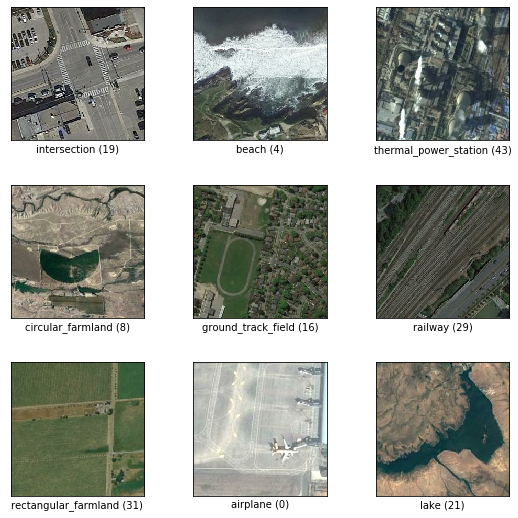

In [6]:
fig = tfds.show_examples(ds, inf)

In [7]:
print(inf)

tfds.core.DatasetInfo(
    name='resisc45',
    version=3.0.0,
    description='RESISC45 dataset is a publicly available benchmark for Remote Sensing Image
Scene Classification (RESISC), created by Northwestern Polytechnical University
(NWPU). This dataset contains 31,500 images, covering 45 scene classes with 700
images in each class.',
    homepage='http://www.escience.cn/people/JunweiHan/NWPU-RESISC45.html',
    features=FeaturesDict({
        'filename': Text(shape=(), dtype=tf.string),
        'image': Image(shape=(256, 256, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=45),
    }),
    total_num_examples=31500,
    splits={
        'train': 31500,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{Cheng_2017,
       title={Remote Sensing Image Scene Classification: Benchmark and State of the Art},
       volume={105},
       ISSN={1558-2256},
       url={http://dx.doi.org/10.1109/JPROC.2017.2675998},
       DOI={10.110

['filename', 'image', 'label']


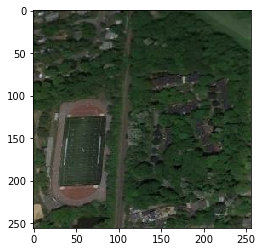

In [8]:
import matplotlib.pyplot as plt

ds = ds.take(1)
for example in ds:
    print(list(example.keys()))
    imageArr = (example['image'])
    img = plt.imshow(imageArr)

The above examples show how to use and get to know the dataset with the tensorflow methods and processess for official built-in tensorflow datasets. Next we will see how to load in your own data and create your own labels.

## Load Your Own Dataset 

The images for resisc45 have to be manually downloaded.  
The directory path needs to be specified...

In [9]:
DATA_DIR = r"/mnt/data/tensorflow/NWPU-RESISC45/downloads/manual/NWPU-RESISC45/"

The catagories are listed already (above) in the info section of the tfds.builder() method

In [10]:
CATEGORIES = info.features['label'].names

In [21]:
import os
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import array_to_img

training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATA_DIR, category)
        class_num = CATEGORIES.index(category)
        count = 0
        for image in os.listdir(path):
            try:
                img = load_img(os.path.join(path, image))
                imgArr = img_to_array(img)
                #print(imgArr)
                training_data.append([imgArr, class_num])
            except:
                pass
            count += 1
            
            # in this case we are limiting the number of images to 50 otherwise the dataset would
            # be bigger than RAM
            # this can be countered by writing the data to numerous files
            
            if count >= 51:
                break

In [22]:
create_training_data()

In [23]:
print(len(training_data))

2295
